##Data parsing
The following script will be for parsing in data from Reddit through "praw"


In [0]:
#! python3
# !pip install praw
import praw
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
import matplotlib.pyplot as plt

reddit = praw.Reddit(client_id='biHuZNftcyXJNw',
                     client_secret='NBRuoUNvSSuRp60IqlKZon7l474',
                     user_agent='Learning Curve',
                     username='UltimateFox69',
                     password='ABCD1234')

subreddit = reddit.subreddit('india')

topics_dict = { "title":[], \
                "score":[], \
                "flair":[], \
                "url":[], \
                "num_comments":[], \
                "created": []}

for submission in subreddit.top("year",limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["num_comments"].append(submission.num_comments)
    topics_dict["url"].append(submission.url)
    topics_dict["created"].append(submission.created)

topics_data = pd.DataFrame(topics_dict)

def get_date(created):
    return dt.datetime.fromtimestamp(created)

_timestamp = topics_data["created"].apply(get_date)
topics_data = topics_data.assign(timestamp = _timestamp)

topics_data.to_csv("Required_data.csv", index=False)

##Data Cleaning and Processing
Storing data into different dictionaries so to be able to plot different aspects of data.
Calculating 

In [61]:
import re 
pd.set_option('mode.chained_assignment', None)
posts = pd.read_csv("Required_data.csv")
flair_list = list(posts["flair"])
commentsNum = list(posts["num_comments"])
upvotes_num = list(posts["score"])
flair_dict = {}
flair_comments_per_post = {}
flair_upvotes_per_post = {}
for x in range(len(flair_list)):

  if re.search("Non-Politic.+",flair_list[x]):
    counter = 0
  elif re.search("Poli.+",flair_list[x]) or flair_list[x] == "Demonetization" or flair_list[x] == "CAA-NRC" or flair_list[x] == '[R]eddiquette':
    flair_list[x] = "Politics"
  elif flair_list[x] == 'Zoke Tyme' or flair_list[x] == 'Photography' or flair_list[x] == "Sports" or flair_list[x] == 'Official Sadness Thread' or flair_list[x] == "Food":
    flair_list[x] = "Leisure"
      
  if commentsNum[x] == None:
    commentsNum[x] = 0
  if upvotes_num[x] is None:
    upvotes_num[x] = 0
  if flair_list[x] == None:
    flair_list[x] = "None"

  if flair_list[x] not in flair_dict:
    flair_dict[flair_list[x]] = [commentsNum[x],1,upvotes_num[x],0,0]
  else:
    flair_dict[flair_list[x]][1] += 1
    flair_dict[flair_list[x]][0] += int(commentsNum[x])
  flair_dict[flair_list[x]][3] = flair_dict[flair_list[x]][0]/flair_dict[flair_list[x]][1]
  flair_dict[flair_list[x]][4] = flair_dict[flair_list[x]][2]/flair_dict[flair_list[x]][1]
  flair_comments_per_post[flair_list[x]] = flair_dict[flair_list[x]][3]
  flair_upvotes_per_post[flair_list[x]] = flair_dict[flair_list[x]][4]

# print(i)
# print(flair_dict)
np_flair = np.array(list(flair_comments_per_post.keys()))
np_comments_per_post = np.array(list(flair_comments_per_post.values()))
np_upvotes_per_post = np.array(list(flair_upvotes_per_post.values()))
print(np_flair)
# print(np_comments_per_post)

['Politics' 'Coronavirus' 'Non-Political' 'Leisure' 'Unverified'
 'Science/Technology' 'Business/Finance' 'AskIndia']


##Statistics
Obtaining mean, median and mode of upvotes of all the posts.

In [56]:
# for comments
import statistics as stats
def mode(numbers):
    largestCount = 0
    modes = []
    for x in numbers:
        if x in modes:
            continue
        count = numbers.count(x)
        if count > largestCount:
            del modes[:]
            modes.append(x)
            largestCount = count
        elif count == largestCount:
            modes.append(x)
    print(largestCount)
    return modes
mean = stats.mean(commentsNum)
median = stats.median(commentsNum)
mode = mode(commentsNum)
print("For Comments")
print(mean)
print(median)
print(mode)
def mode2(numbers):
    largestCount = 0
    modes = []
    for x in numbers:
        if x in modes:
            continue
        count = numbers.count(x)
        if count > largestCount:
            del modes[:]
            modes.append(x)
            largestCount = count
        elif count == largestCount:
            modes.append(x)
    print(largestCount)
    return modes
# for upvotes
mean = stats.mean(upvotes_num)
median = stats.median(upvotes_num)
modeUpvotes = mode2(upvotes_num)
print("For Upvotes")
print(mean)
print(median)
print(modeUpvotes)


4
For Comments
269.276
184.5
[179, 150, 187, 152, 115]
3
For Upvotes
3827.144
3207.0
[3602, 2930]


##Data plotting 


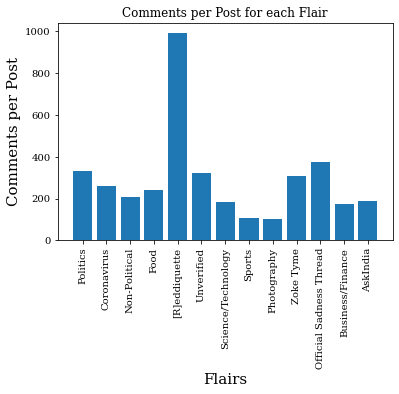

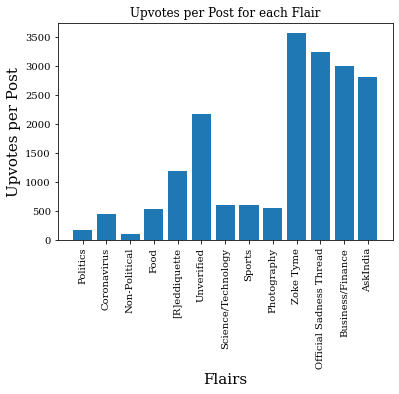

In [57]:
def plot_bar_x(y_axis_val, y_label, title):
    # this is for plotting purpose
    index = np.arange(len(np_flair))
    plt.bar(index, y_axis_val)
    plt.xlabel('Flairs', fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.xticks(index, np_flair, fontsize=10, rotation=90)
    plt.title(title)
    plt.show()
    plt.close()
plot_bar_x(np_comments_per_post, 'Comments per Post', 'Comments per Post for each Flair')
plot_bar_x(np_upvotes_per_post, "Upvotes per Post", "Upvotes per Post for each Flair")